In [1]:
# Import Data df2
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
df2 = pd.read_csv('df_def_gen.csv')
df2.drop(columns=['Unnamed: 0'],inplace=True)

In [2]:
df2.head()

,user_id,time,cough,congestion,fever,nausea,depressed,stress,time_proximity,n_contacts,...,BlogLivejournalTwitter,CloseFriend,FacebookAllTaggedPhotos,PoliticalDiscussant,SocializeTwicePerWeek,Unknown,n_sick_contacts,Target,Target_prob,Target_bin
0,2,2009-01-09,0,0,0,0,1,1,2009-01-07,109.0,...,0.0,0.0,0.0,1.0,0.0,108.0,0.0,0,0.0,False
1,2,2009-01-10,0,0,0,0,1,1,2009-01-08,42.0,...,1.0,0.0,1.0,1.0,1.0,41.0,0.0,0,0.0,False
2,2,2009-01-11,0,0,0,0,0,0,2009-01-09,68.0,...,18.0,1.0,26.0,30.0,18.0,33.0,0.0,0,0.0,False
3,2,2009-01-12,0,0,0,1,0,0,2009-01-10,107.0,...,0.0,0.0,0.0,0.0,0.0,107.0,96.0,1,0.5,True
4,2,2009-01-13,0,0,0,0,0,0,2009-01-11,95.0,...,15.0,14.0,27.0,15.0,2.0,68.0,2.0,0,0.0,False


In [3]:
id_c = df2.groupby('user_id').sum()
id_c = id_c.reset_index()
id_c.head()

,user_id,cough,congestion,fever,nausea,depressed,stress,n_contacts,n_contacts_48,BlogLivejournalTwitter,CloseFriend,FacebookAllTaggedPhotos,PoliticalDiscussant,SocializeTwicePerWeek,Unknown,n_sick_contacts,Target,Target_prob,Target_bin
0,2,19,14,0,6,31,14,17658.0,34160.0,2483.0,1012.0,3084.0,4395.0,3339.0,13245.0,3129.0,39,15.42,27.0
1,4,0,6,0,7,1,1,44950.0,88184.0,18662.0,13449.0,18662.0,18662.0,19609.0,25341.0,10365.0,13,5.82,11.0
2,5,1,2,0,0,0,2,13497.0,27404.0,2715.0,2157.0,9717.0,1108.0,2446.0,3780.0,2584.0,3,1.50,3.0
3,7,14,10,0,2,0,2,12591.0,24325.0,6582.0,5179.0,6582.0,4370.0,4943.0,6009.0,1971.0,26,11.64,22.0
4,8,0,1,0,0,0,0,10545.0,17817.0,0.0,2198.0,0.0,2218.0,2427.0,8118.0,2144.0,1,0.50,1.0


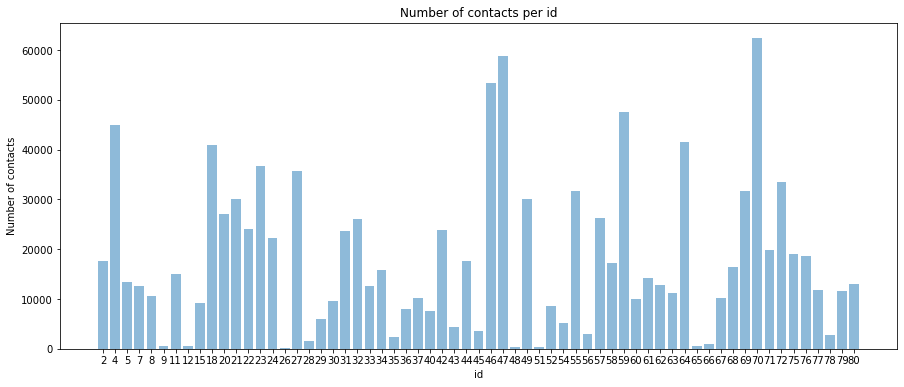

In [4]:
plt.figure(1, figsize=(15, 6))

objects = id_c.user_id
y_pos = np.arange(len(objects))
performance = id_c.n_contacts

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of contacts')
plt.xlabel('id')
plt.title('Number of contacts per id')
plt.savefig('Number of contacts per id.png')
plt.show()

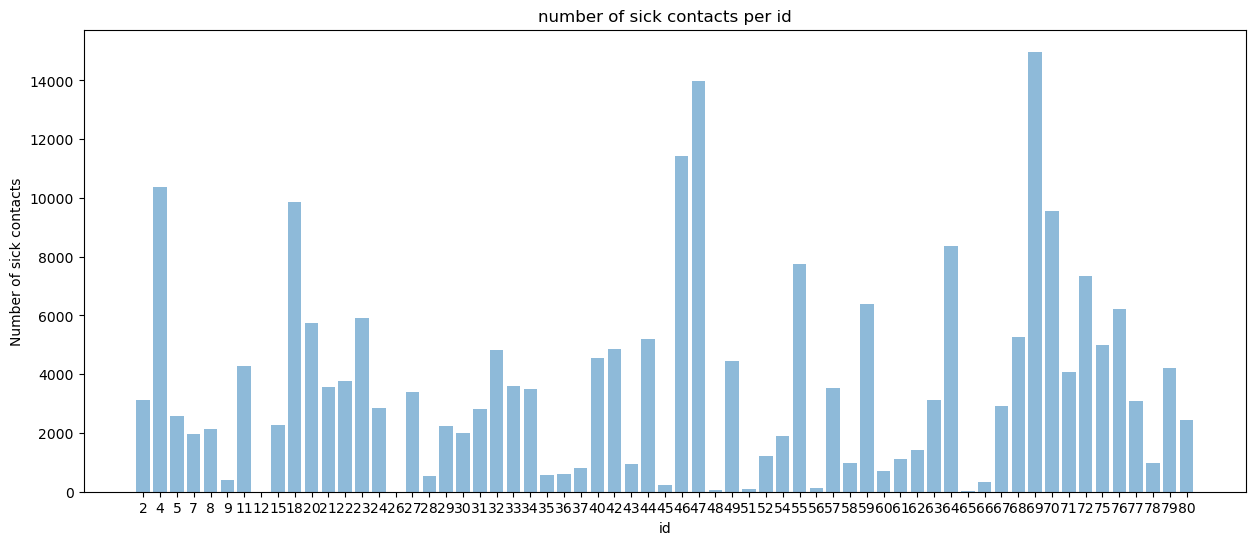

In [6]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
plt.figure(1, figsize=(15, 6))

objects = id_c.user_id
y_pos = np.arange(len(objects))
performance = id_c.n_sick_contacts

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Number of sick contacts')
plt.xlabel('id')
plt.title('number of sick contacts per id')

plt.savefig('number of sick contacts per id.png')

plt.show()

In [7]:
sick = df2.groupby(['time','Target_bin']).count().reset_index()
sick1 = sick[sick.Target_bin == True]
no_sick = sick[sick.Target_bin == False]


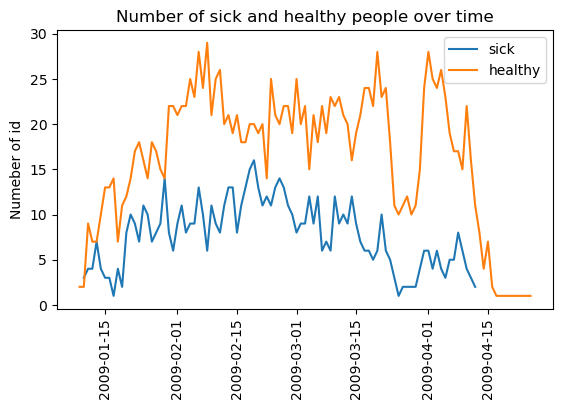

In [10]:
import datetime
import random
import matplotlib.pyplot as plt
date_time = sick1.time
date_time = pd.to_datetime(date_time)

date_time2 = no_sick.time
date_time2 = pd.to_datetime(date_time2)


temp1 =sick1.user_id
temp2 =no_sick.user_id

DF = pd.DataFrame()
DF2 =pd.DataFrame() 
DF['temp'] = temp1
DF2['temp2'] = temp2
DF = DF.set_index(date_time)
DF2 = DF2.set_index(date_time2)
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.ylabel('Numeber of id')

plt.title("Number of sick and healthy people over time")
plt.plot(DF)
plt.plot(DF2)

plt.legend(['sick', 'healthy'])

plt.savefig('Number of sick and healthy people over time.png')


In [11]:
print(no_sick.time.max())
print(sick1.time.max())

2009-04-25
2009-04-12


In [12]:
sick_con = df2.groupby(['time']).sum().reset_index()
sick_con.head()

,time,user_id,cough,congestion,fever,nausea,depressed,stress,n_contacts,n_contacts_48,BlogLivejournalTwitter,CloseFriend,FacebookAllTaggedPhotos,PoliticalDiscussant,SocializeTwicePerWeek,Unknown,n_sick_contacts,Target,Target_prob,Target_bin
0,2009-01-09,48,0,0,0,0,1,1,681.0,1014.0,271.0,112.0,271.0,113.0,112.0,409.0,0.0,0,0.00,0.0
1,2009-01-10,187,1,1,0,1,1,1,537.0,1445.0,375.0,215.0,375.0,298.0,299.0,161.0,0.0,3,1.50,3.0
2,2009-01-11,502,1,4,0,2,0,0,902.0,2151.0,448.0,211.0,429.0,350.0,390.0,402.0,0.0,7,2.48,4.0
3,2009-01-12,443,1,3,0,1,0,0,1516.0,2322.0,846.0,322.0,850.0,169.0,458.0,663.0,338.0,5,2.16,4.0
4,2009-01-13,588,4,6,2,2,2,2,1842.0,3574.0,987.0,553.0,1001.0,560.0,637.0,832.0,244.0,14,4.66,7.0


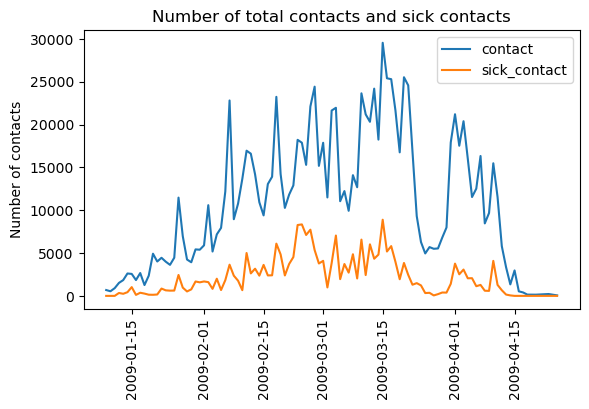

In [13]:
date_time = sick_con.time
date_time = pd.to_datetime(date_time)


temp1 =sick_con.n_contacts
temp2 =sick_con.n_sick_contacts

DF = pd.DataFrame()
DF2 =pd.DataFrame() 
DF['temp'] = temp1
DF2['temp2'] = temp2
DF = DF.set_index(date_time)
DF2 = DF2.set_index(date_time)
fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3)
plt.xticks(rotation=90)
plt.ylabel('Number of contacts')
plt.title("Number of total contacts and sick contacts")
plt.plot(DF)
plt.plot(DF2)

plt.legend(['contact', 'sick_contact'])

plt.savefig("Number of total contacts and sick contacts.png")

In [14]:
# Imported Libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

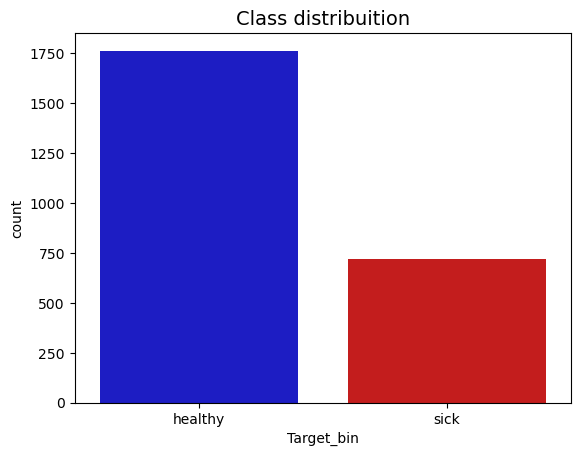

<Figure size 640x480 with 0 Axes>

In [15]:
colors = ["#0101DF", "#DF0101"]
g = sns.countplot('Target_bin', data=df2, palette=colors)
plt.title('Class distribuition', fontsize=14)
g.set_xticklabels( ['healthy', 'sick'])
plt.show()

plt.savefig("Class distribuition.png")

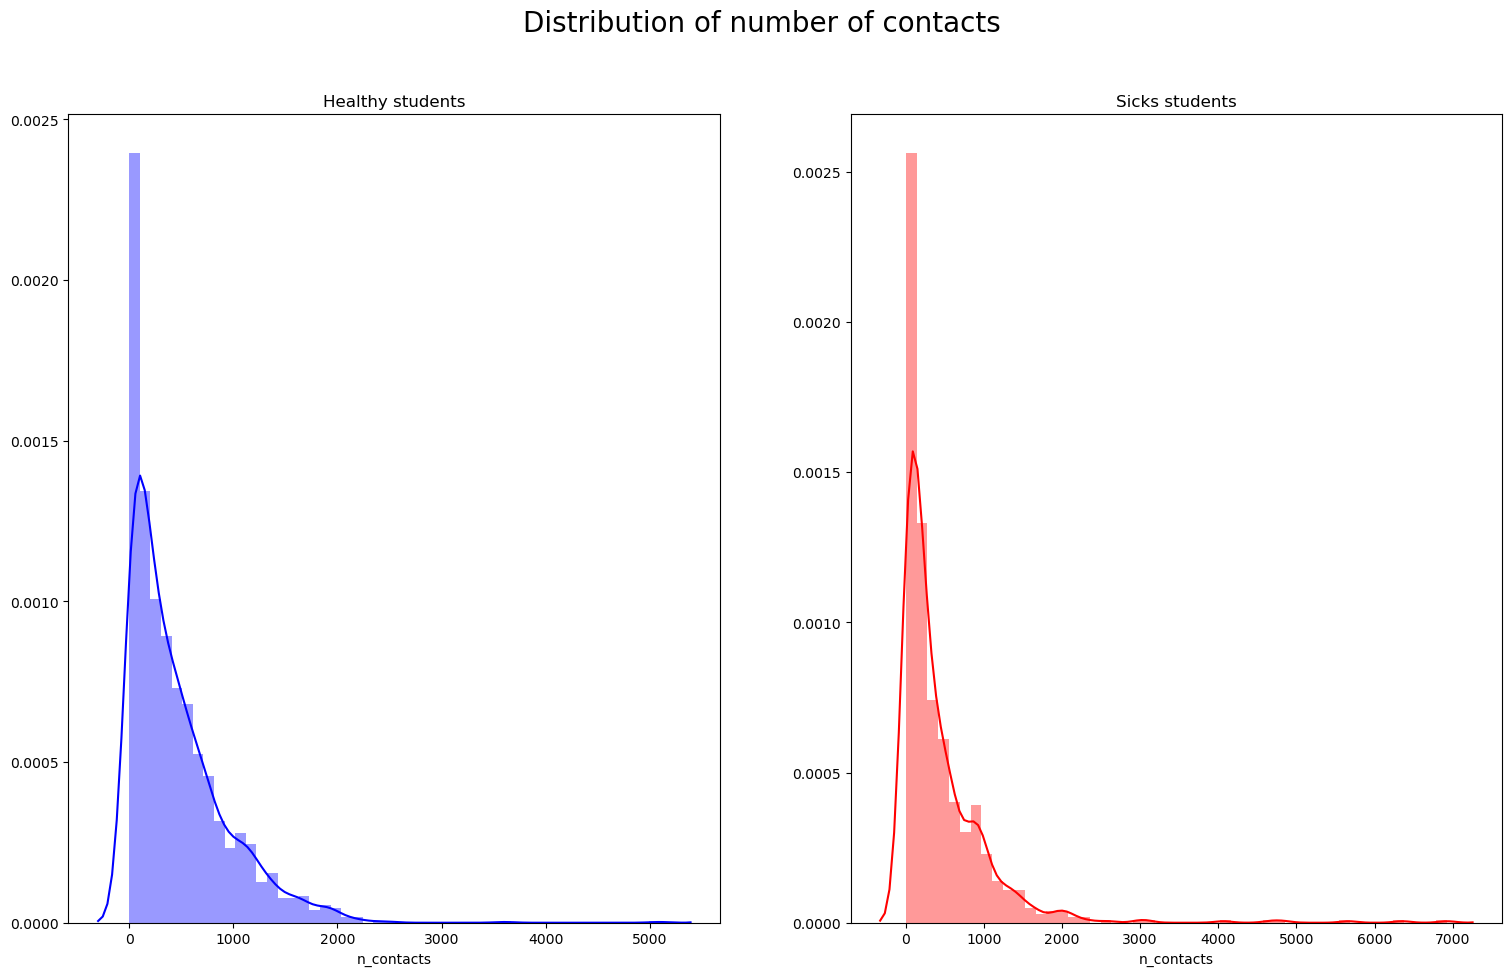

In [16]:

sick = df2[df2.Target_bin == True]
hel = df2[df2.Target_bin == False]

fig, ax =plt.subplots(1,2)
fig.set_size_inches(18.5, 10.5)

sns.distplot(hel.n_contacts, color = 'blue',ax=ax[0]).set_title("Healthy students")
sns.distplot(sick.n_contacts, color = 'red',ax=ax[1]).set_title("Sicks students")


fig.suptitle('Distribution of number of contacts',fontsize=20)


plt.savefig("Distribution of number of contacts.png")